In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones:

- initial_temps = np.logspace(2, 6, num=6)  # [1e2, 1e3, 1e4, 1e5, 1e6]
- final_temps = np.logspace(-3, 1, num=5)  # [1e-3, 1e-2, 1e-1, 1, 10]
- alphas = [0.90, 0.93, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
- max_iters = [5_000, 10_000, 50_000, 100_000, 250_000]

In [3]:
df285 = pd.read_csv("../../results/configurations/experimento3-INF285.csv")
df295 = pd.read_csv("../../results/configurations/experimento3-INF295.csv")

total_285 = 31
total_295 = 26

In [4]:
print(df285.head())
print(df285.info())

  config_id  initial_temp  final_temp  alpha  max_iter  time  final_fitness  \
0   cfg_001         100.0       0.001    0.9      5000  0.21      24.333333   
1   cfg_002         100.0       0.001    0.9     10000  0.22      23.833333   
2   cfg_003         100.0       0.001    0.9     50000  0.18      23.833333   
3   cfg_004         100.0       0.001    0.9    100000  0.19      21.333333   
4   cfg_005         100.0       0.001    0.9    250000  0.18      22.000000   

   validity  
0      True  
1      True  
2      True  
3      True  
4      True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   config_id      1200 non-null   object 
 1   initial_temp   1200 non-null   float64
 2   final_temp     1200 non-null   float64
 3   alpha          1200 non-null   float64
 4   max_iter       1200 non-null   int64  
 5   time           1200 no

In [5]:
valid_df285 = df285[df285["validity"]].copy()
valil_df295 = df295[df295["validity"]].copy()

best_config_285 = valid_df285.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).iloc[0]

best_config_295 = valil_df295.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).iloc[0]

In [6]:
print("Mejor configuración encontrada Test A:")
print(best_config_285)
print(f"Fitness normalizado: {round(best_config_285['final_fitness']*100 / total_285, 2)}\n")

print("Mejor configuración encontrada Test B:")
print(best_config_295)
print(f"Fitness normalizado: {round(best_config_295['final_fitness']*100 / total_295,2)}")

Mejor configuración encontrada Test A:
config_id          cfg_133
initial_temp         100.0
final_temp             1.0
alpha                 0.95
max_iter             50000
time                  0.14
final_fitness    26.333333
validity              True
Name: 132, dtype: object
Fitness normalizado: 84.95

Mejor configuración encontrada Test B:
config_id          cfg_166
initial_temp         100.0
final_temp            10.0
alpha                 0.93
max_iter              5000
time                  0.06
final_fitness    17.333333
validity              True
Name: 165, dtype: object
Fitness normalizado: 66.67


In [6]:
print("Resumen estadístico de las soluciones válidas:")
valid_df = valid_df285
print(valid_df.describe())

Resumen estadístico de las soluciones válidas:
       initial_temp   final_temp        alpha       max_iter         time  \
count   1512.000000  1512.000000  1512.000000    1512.000000  1512.000000   
mean     110.183333     0.185184     0.940714  111000.000000     0.854319   
std      177.897158     0.366259     0.048303  177400.152284     1.402837   
min        0.100000     0.000001     0.850000    1000.000000     0.000000   
25%        1.000000     0.000100     0.900000    5000.000000     0.100000   
50%       30.000000     0.005500     0.950000   30000.000000     0.260000   
75%      100.000000     0.100000     0.990000  100000.000000     0.902500   
max      500.000000     1.000000     0.995000  500000.000000     8.310000   

       final_fitness  
count    1512.000000  
mean       23.792218  
std         2.185323  
min        18.966667  
25%        22.666667  
50%        24.833333  
75%        24.833333  
max        26.333333  


In [7]:
print("Promedio de tiempo por configuración:")
print(valid_df["time"].mean())

Promedio de tiempo por configuración:
0.8543187830687831


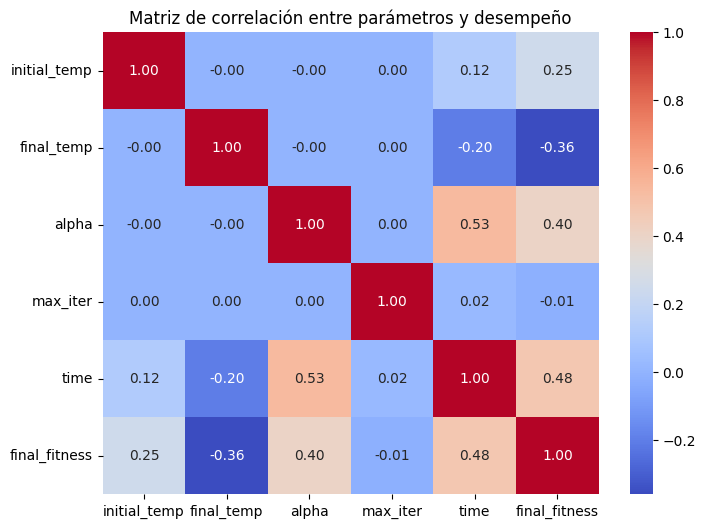

In [8]:
corr = valid_df[
    ["initial_temp", "final_temp", "alpha", "max_iter", "time", "final_fitness"]
].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre parámetros y desempeño")
plt.show()

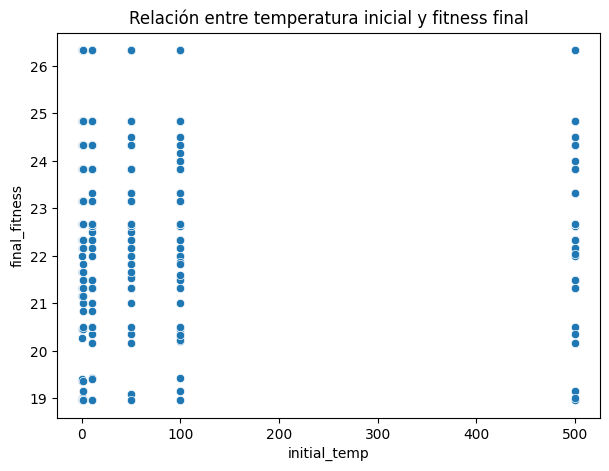

In [9]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="initial_temp", y="final_fitness")
plt.title("Relación entre temperatura inicial y fitness final")
plt.show()

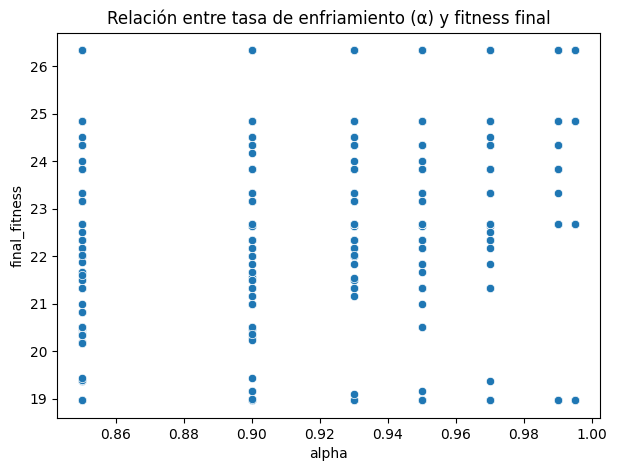

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="alpha", y="final_fitness")
plt.title("Relación entre tasa de enfriamiento (α) y fitness final")
plt.show()

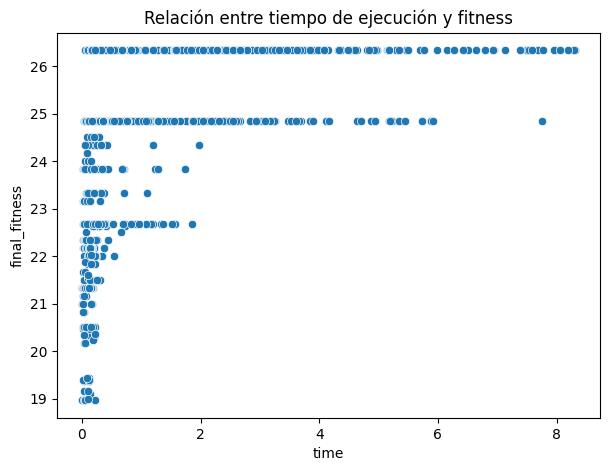

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="time", y="final_fitness")
plt.title("Relación entre tiempo de ejecución y fitness")
plt.show()

In [12]:
valid_df["fitness_per_time"] = valid_df["final_fitness"] / valid_df["time"]
best_efficiency = valid_df.loc[valid_df["fitness_per_time"].idxmax()]

print("Configuración más eficiente (mejor fitness/tiempo):")
print(best_efficiency)

Configuración más eficiente (mejor fitness/tiempo):
config_id             cfg_169
initial_temp              0.1
final_temp                0.1
alpha                    0.85
max_iter               1000.0
time                      0.0
final_fitness       18.966667
validity                 True
fitness_per_time          inf
Name: 168, dtype: object


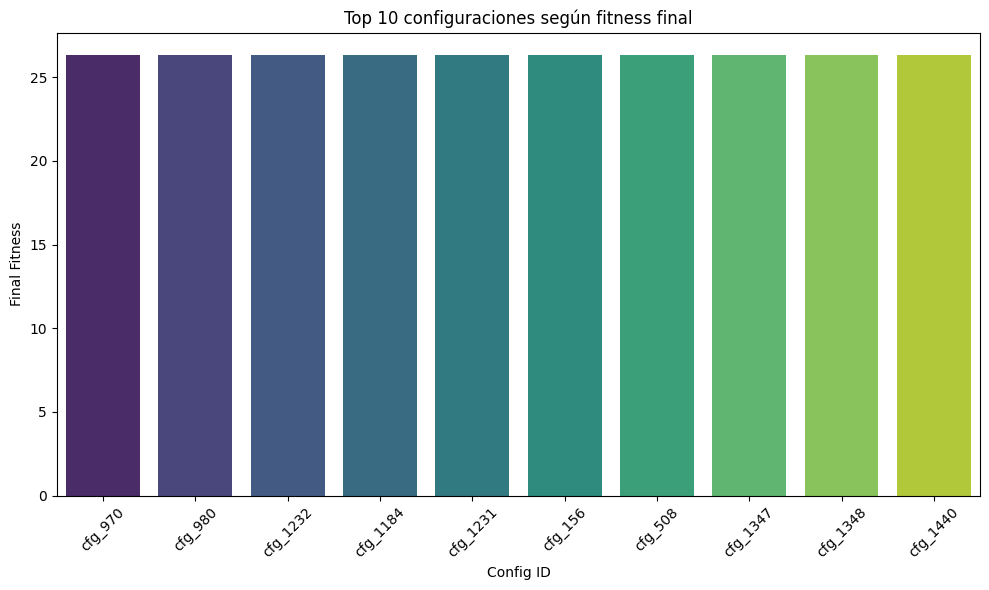

In [13]:
ranking = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranking,
    x="config_id",
    y="final_fitness",
    hue="config_id",
    palette="viridis",
    legend=False,
)
plt.title("Top 10 configuraciones según fitness final")
plt.xlabel("Config ID")
plt.ylabel("Final Fitness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

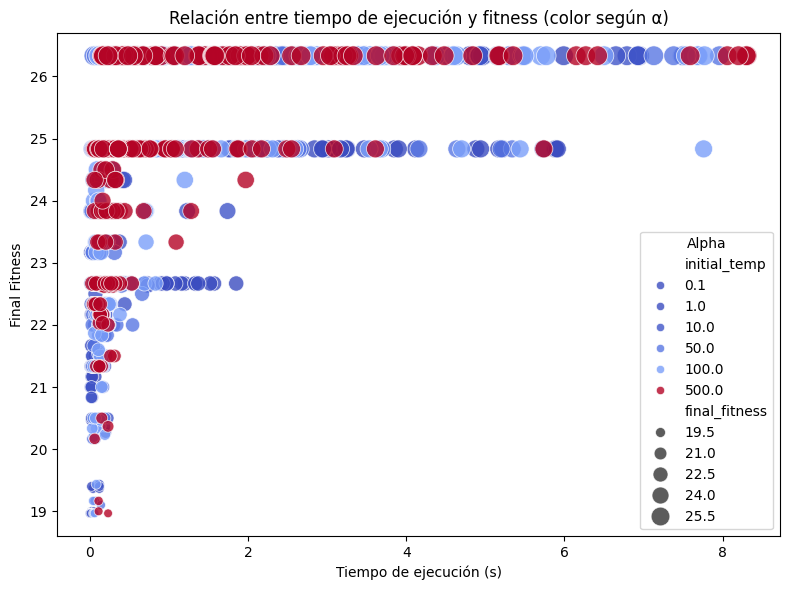

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="initial_temp",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

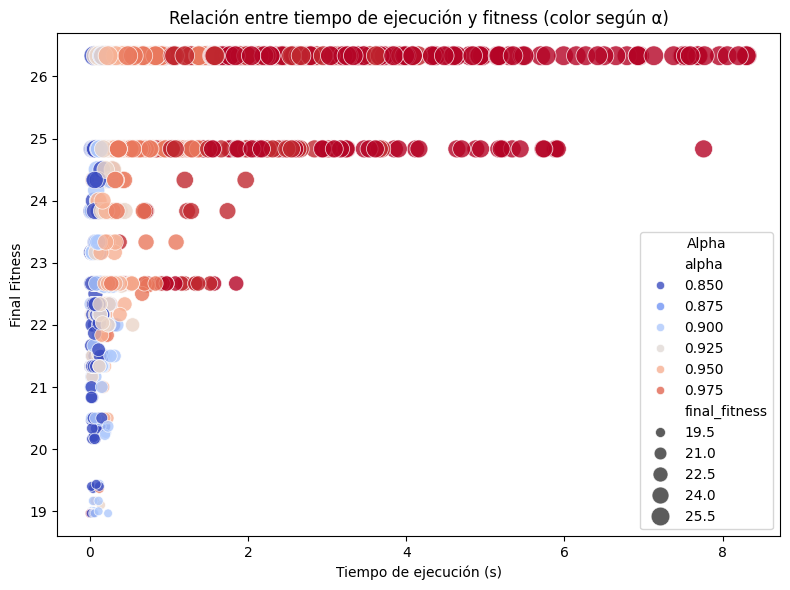

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="alpha",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

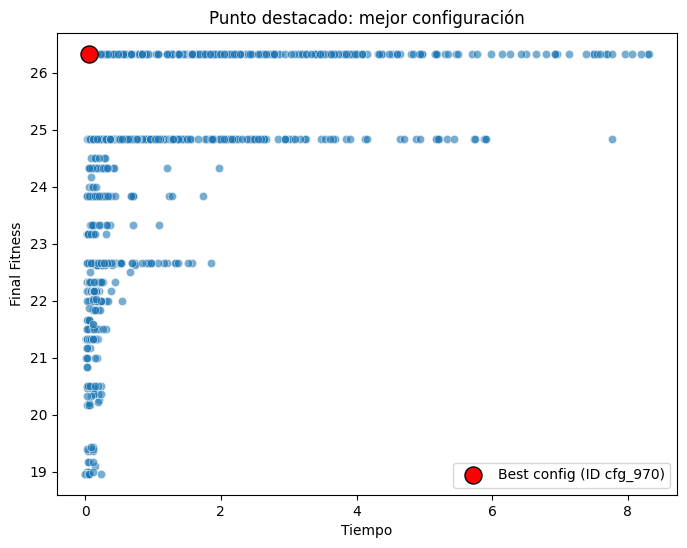

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=valid_df, x="time", y="final_fitness", alpha=0.6)
plt.scatter(
    best_config_285["time"],
    best_config_285["final_fitness"],
    color="red",
    s=150,
    edgecolor="black",
    label=f"Best config (ID {best_config_285['config_id']})",
)
plt.legend()
plt.title("Punto destacado: mejor configuración")
plt.xlabel("Tiempo")
plt.ylabel("Final Fitness")
plt.show()